In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis 
import numpy as np # fundamental package for scientific computing with Python
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seabornimport plotly.graph_objs as go
import squarify
from numpy import array
from matplotlib import cm
from fbprophet import Prophet

In [2]:
#以中国为例
cn_data= pd.read_csv('./处理后的数据集/alltime_China_to4.1.csv')
#USA_data=data_part_allworld[data_part_allworld['名称']=='美国']
#USA_data.reset_index(drop=True, inplace=True)
cn_data

,日期,累计确诊,累计死亡,累计治愈,累计重症,累计疑似,当日新增确诊,当日新增死亡,当日新增治愈,当日现存确诊,当日新增疑似
0,2020/1/20,291,6,25,0,54,291,6,25,260,27
1,2020/1/21,440,9,25,102,37,149,3,0,406,26
2,2020/1/22,571,17,28,95,393,131,8,3,526,257
3,2020/1/23,830,25,34,177,1072,259,8,6,771,680
4,2020/1/24,1287,41,38,237,1965,457,16,4,1208,1118
...,...,...,...,...,...,...,...,...,...,...,...
66,2020/3/26,81340,3292,74588,1034,189,55,5,537,3460,49
67,2020/3/27,81394,3295,74971,921,184,54,3,383,3128,29
68,2020/3/28,81439,3300,75448,742,174,45,5,477,2691,28
69,2020/3/29,81470,3304,75770,633,168,31,4,322,2396,17


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


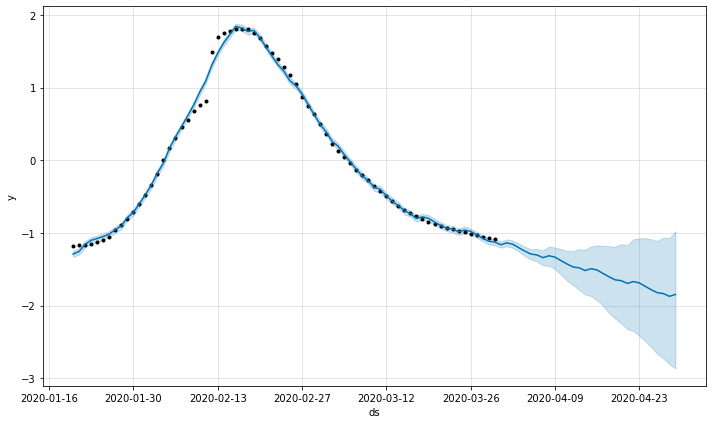

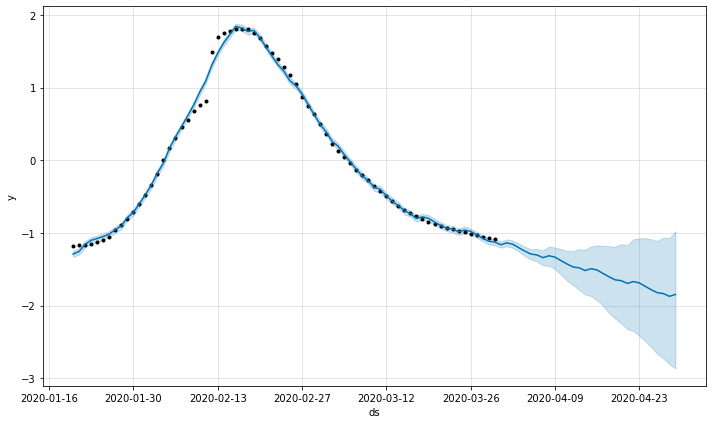

In [11]:
df = cn_data[['日期','当日现存确诊']]
#因为 Prophet 所需要的两列名称是 'ds' 和 'y'，其中，'ds' 表示时间戳，'y' 表示时间序列的值，
#因此通常来说都需要修改 pd.dataframe 的列名字
df = df.rename(columns={'日期':'ds', '当日现存确诊':'y'})
#如果 '日期' 是使用 unixtime 来记录的，需要修改成 YYYY-MM-DD hh:mm:ss 的形式
#df['ds'] = pd.to_datetime(df['ds'],unit='s')
#时间序列需要进行归一化的操作
df['y'] = (df['y'] - df['y'].mean()) / (df['y'].std())
#节假日的设置
hol = pd.DataFrame({'holiday': 'hol',
                     'ds':pd.to_datetime(['2020-03-12']),
                   'lower_window':0,
                   'upper_window':1})

#初始化模型
#holidays_prior_scale值越大，该节假日对模型的影响越大，值越小，节假日的影响越小。（默认10）
#changepoint_prior_scale增长趋势模型的灵活度。调节”changepoint”选择的灵活度，值越大选择的”changepoint”越多，使模型对历史数据的拟合程度变强，然而也增加了过拟合的风险。（默认0.05）
m = Prophet(changepoint_range=0.9,changepoint_prior_scale=0.2,interval_width=0.5,holidays=hol)
#拟合模型
m.fit(df)
#计算预测值：periods 表示需要预测的点数，freq 表示时间序列的频率。
future = m.make_future_dataframe(periods=30,freq='D')
forecast = m.predict(future)
#画出预测图：
m.plot(forecast)

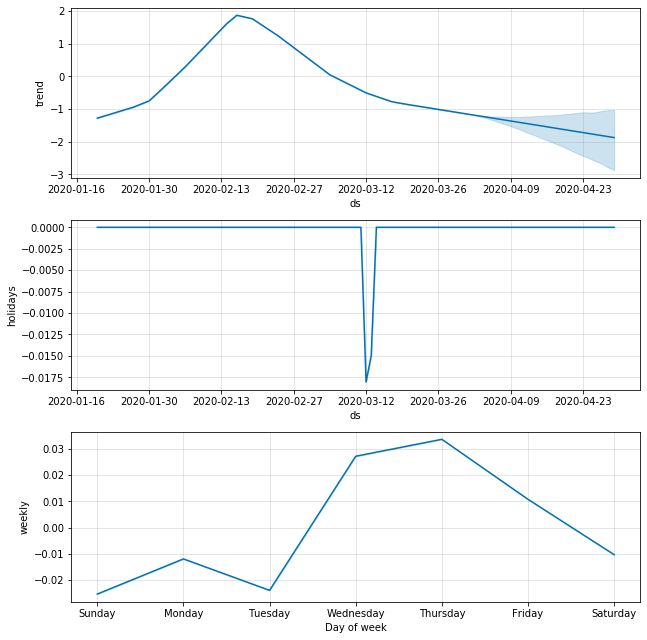

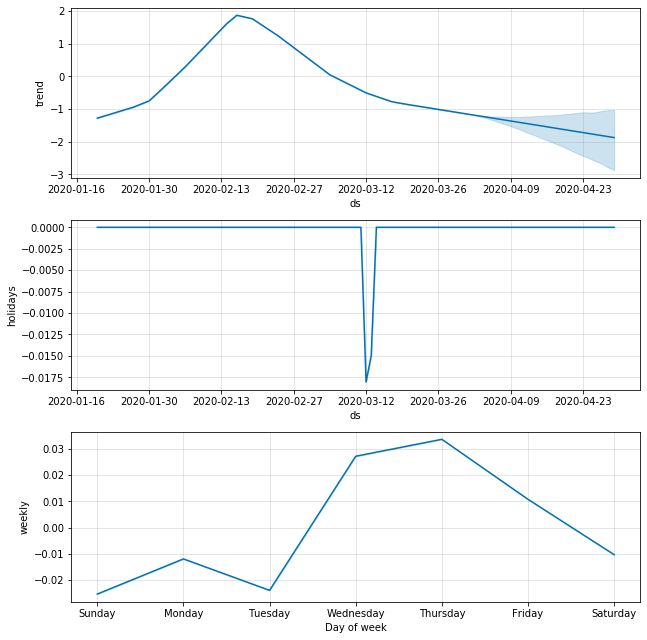

In [12]:
#画出时间序列的分量：
m.plot_components(forecast)

In [15]:
#以美国为例
data_part_allworld= pd.read_csv('./处理后的数据集/部分热门国家数据.csv')
USA_data=data_part_allworld[data_part_allworld['名称']=='美国']
USA_data.reset_index(drop=True, inplace=True)
USA_data

,日期,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,2020-02-08,美国,14,0,0,0,0,14,0.0,0,0,NaN,14
1,2020-02-13,美国,15,0,0,0,0,1,0.0,0,0,NaN,15
2,2020-02-21,美国,34,0,0,0,0,19,0.0,0,0,NaN,34
3,2020-02-22,美国,53,0,0,0,0,19,0.0,0,0,NaN,53
4,2020-02-24,美国,53,0,0,0,0,0,0.0,0,0,NaN,53
5,2020-02-25,美国,57,0,0,0,0,4,0.0,0,0,NaN,57
6,2020-02-26,美国,60,0,0,0,0,3,0.0,0,0,NaN,60
7,2020-02-27,美国,60,0,0,0,0,0,NaN,0,0,NaN,60
8,2020-02-28,美国,63,0,1,0,0,3,0.0,1,0,NaN,62
9,2020-02-29,美国,63,0,1,1,0,0,0.0,0,1,NaN,61


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


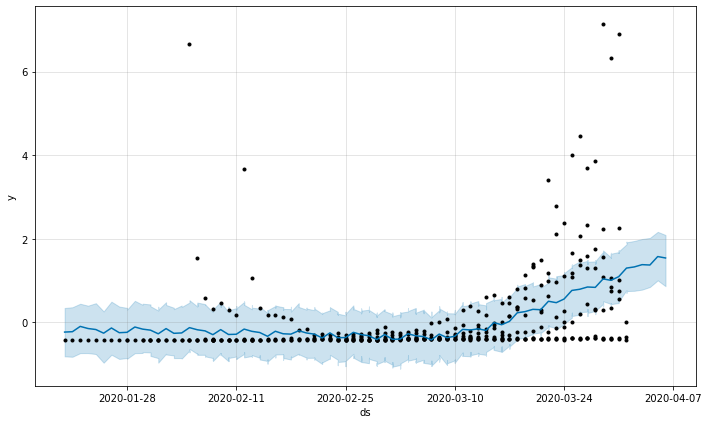

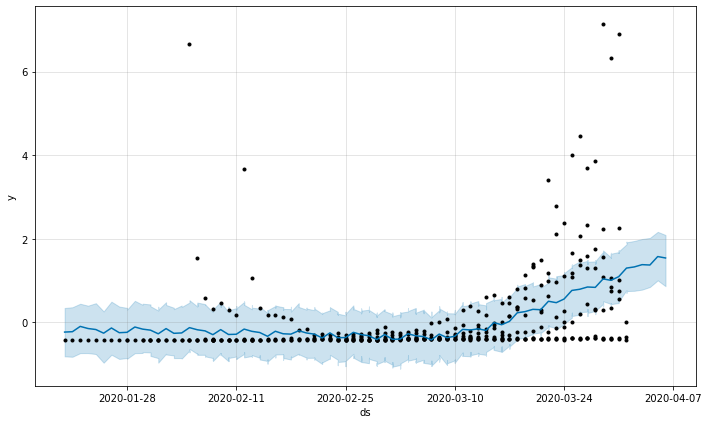

In [17]:
df = cn_data[['日期','当日新增确诊']]
#因为 Prophet 所需要的两列名称是 'ds' 和 'y'，其中，'ds' 表示时间戳，'y' 表示时间序列的值，
#因此通常来说都需要修改 pd.dataframe 的列名字
df = df.rename(columns={'日期':'ds', '当日新增确诊':'y'})
#如果 '日期' 是使用 unixtime 来记录的，需要修改成 YYYY-MM-DD hh:mm:ss 的形式
#df['ds'] = pd.to_datetime(df['ds'],unit='s')
#时间序列需要进行归一化的操作
df['y'] = (df['y'] - df['y'].mean()) / (df['y'].std())
#节假日的设置
hol = pd.DataFrame({'holiday': 'hol',
                     'ds':pd.to_datetime(['2020-02-17']),
                   'lower_window':0,
                   'upper_window':1})

#初始化模型
#holidays_prior_scale值越大，该节假日对模型的影响越大，值越小，节假日的影响越小。（默认10）
#changepoint_prior_scale增长趋势模型的灵活度。调节”changepoint”选择的灵活度，值越大选择的”changepoint”越多，使模型对历史数据的拟合程度变强，然而也增加了过拟合的风险。（默认0.05）
m = Prophet(changepoint_range=0.9,changepoint_prior_scale=0.2,interval_width=0.5,holidays=hol)
#拟合模型
m.fit(df)
#计算预测值：periods 表示需要预测的点数，freq 表示时间序列的频率。
future = m.make_future_dataframe(periods=5,freq='D')
forecast = m.predict(future)
#画出预测图：
m.plot(forecast)

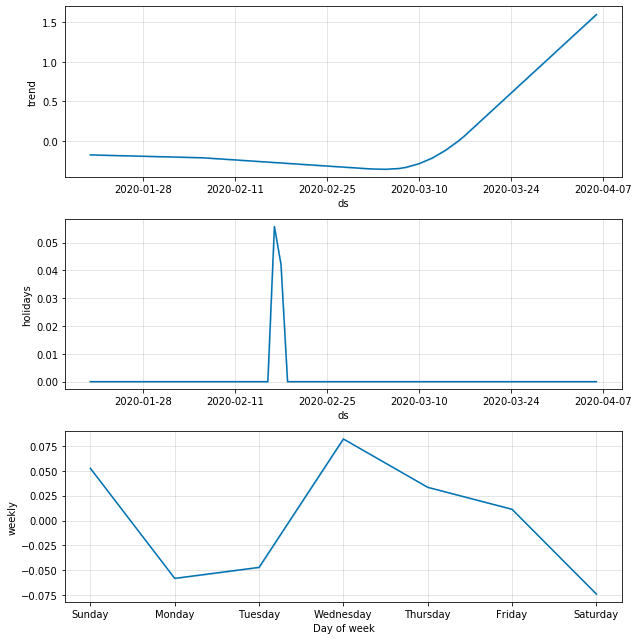

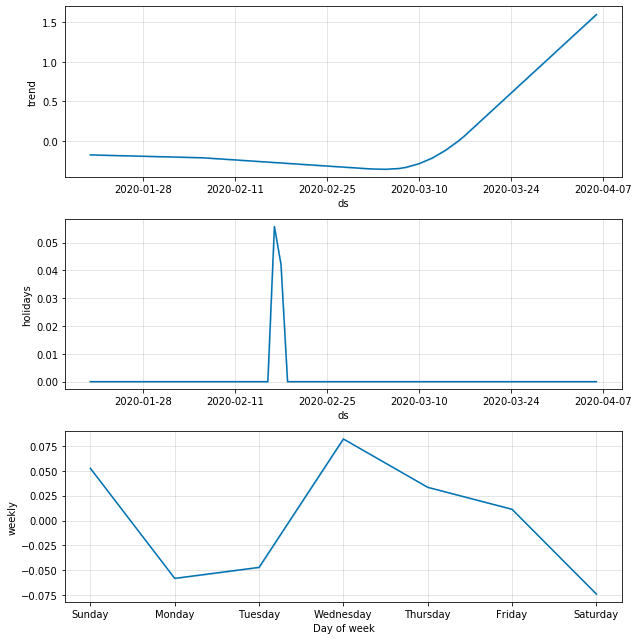

In [18]:
#画出时间序列的分量：
m.plot_components(forecast)